# Proyecto 2 Product Development

## Librerias

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

# Pipe line numeric features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Training Predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

#instalacion --> pip install joblib     genera como paquetes y bajar a disco bajar objetos
import joblib



## Carga de Dataset Train-Test


In [16]:

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Verificion de columnas con texto

In [19]:
train.columns[train.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

## Verificion de columnas numericas

In [20]:
train.columns[train.dtypes != 'object']


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploracion de los datos

In [22]:
100 * train.isna().sum()/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

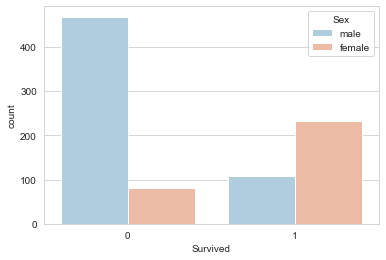

In [23]:
# Sobrevientes por sexo
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

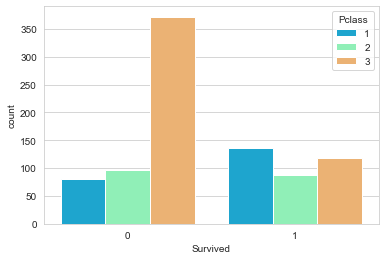

In [24]:
# Pasajero por clase
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

c:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

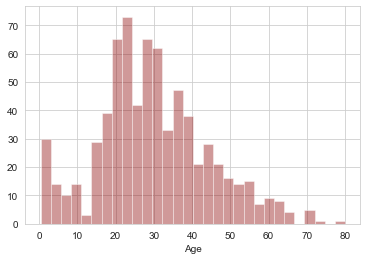

In [25]:
# Distribucion por edad
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

## Limpieza de datos

In [26]:
label = train['Survived'].copy()
train = train.drop('Survived', axis=1)

# My procesors

In [27]:
class GroupImputer(BaseEstimator, TransformerMixin):

    def __init__(self, group_cols, target, metric='mean'):
        
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
                                                            .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind] = X.loc[ind].fillna(row[self.target])
        
        return X.values

# Imputaciones

In [28]:
imp = GroupImputer(group_cols=['Pclass'], 
                   target='Age', 
                   metric='median')
train_imp = pd.DataFrame(imp.fit_transform(train), 
                      columns=train.columns)

In [29]:
print(f'train contains {sum(pd.isnull(train.Age))} missing values.')
print(f'train_imp contains {sum(pd.isnull(train_imp.Age))} missing values.')

train contains 177 missing values.
train_imp contains 0 missing values.


In [30]:
train[train['Age'].isnull()].head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [31]:
train_imp[train['Age'].isnull()].head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,24.0,Q
17,18,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0,29.0,S
19,20,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.225,24.0,C
26,27,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.225,24.0,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,24.0,Q


In [32]:


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

# Pipeline Feature Engeniering

In [33]:
train_num = train[train.columns[train.dtypes != 'object']]
num_attribs = list(train_num)


In [34]:
train_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [35]:
num_pipeline = Pipeline([
        ('select_numeric', DataFrameSelector(['Pclass','Age', 'SibSp', 'Parch', 'Fare'])),
        ('imputer', GroupImputer(group_cols=['Pclass'], target='Age', metric='median')),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train)

In [36]:
pd_train_num_tr = pd.DataFrame(train_num_tr, columns=['Pclass','Age', 'SibSp', 'Parch', 'Fare'])


In [37]:
pd_train_num_tr.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [38]:
train_cat = train[train.columns[train.dtypes == 'object']]
cat_attribs = list(train_cat)


In [39]:
train_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [40]:
cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Sex','Embarked'])),
        ('imputer', SimpleImputer(strategy="most_frequent")) #,
       # ('onehot', OneHotEncoder(sparse=False))
    ])

train_cat_tr = cat_pipeline.fit_transform(train)

In [41]:
pd_train_cat_tr = pd.DataFrame(train_cat_tr, columns = ['Sex','Embarked'])
train_cat_tr

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [42]:
pd_train_cat_tr.isnull().sum()


Sex         0
Embarked    0
dtype: int64

In [43]:
pd_train_cat_tr[train['Embarked'].isnull()].head()

,Sex,Embarked
61,female,S
829,female,S


In [44]:
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Sex','Embarked'])),
        ('imputer', SimpleImputer(strategy="most_frequent")) ,
        ('onehot', OneHotEncoder(sparse=False))
    ])
train_cat_tr = cat_pipeline.fit_transform(train)

In [46]:
train_cat_tr

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [47]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

# Preparar datos para entrenamiento

In [48]:
X_train = preprocess_pipeline.fit_transform(train)
X_train


array([[ 0.82737724, -0.53383369,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.67489052,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.23165264, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.38274316,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.23165264, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.22161894, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
y_train = label

# Entreamiento y predicion

In [50]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [51]:
X_test = preprocess_pipeline.fit_transform(test)
y_pred = logmodel.predict(X_test)

In [52]:
logmodel_scores = cross_val_score(logmodel, X_train, y_train, cv=20)
logmodel_scores.mean()

0.803560606060606

## RandomForest classifie

In [56]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=101)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()


0.8204868913857677

## Generacion de arcivos pkl

In [53]:
joblib.dump(logmodel, 'Survived_pipeline.pkl')

['Survived_pipeline.pkl']

In [54]:
#Variables a utilzar en el entrenamiento
FEATURES = [
    'Pclass',
    'Sex',  
    'Age', 
    'SibSp', 
    'Parch', 
    'Fare',  
]

In [55]:
joblib.dump(FEATURES, 'FEATURES.pkl')

['FEATURES.pkl']